In [ ]:
#Importando pandas.
import pandas as pd
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('sentiwordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('state_union')
from nltk.corpus import sentiwordnet as swn
from nltk.tag import pos_tag
from nltk.corpus import wordnet
from nltk import sent_tokenize
import pylab
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pylab.rcParams['figure.figsize'] = (15, 11)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package state_union to /root/nltk_data...
[nltk_data]   Package state_union is already up-to-date!


In [ ]:
!gdown --id 127_9stFHHakhgCRkE6rS1GPzydEJ0CFc
!gdown --id 1hZgx3L-u3GqpniF5hHgALQ0ZMuBZgOly
!gdown --id 1rxw3UWNvUfpb78CLxYg7OkdWCAvMHxNS
!gdown --id 1lhmQQA3QzMWtuGfR7jMbCCGZRQEAlxR8
!gdown --id 1k4fA5rltDZS3obcSc8jhn6zgva0dAeuL
!gdown --id 1b1cFc8hdFzzQ7S3Ctwcy_ijJSX3FjX01
!gdown --id 1LzuEuSR2eQAtOciLO_0FX8lnHQNYmhLw
!gdown --id 1Q7k_ZaG7UR7vkuCMJkBC8os_dFG27TEM
!gdown --id 15Tyv15_h-TMJiXy51qUu8VWQNKPw7DGQ
!gdown --id 1_6OJ1yHpxrSdrCnNuBIu3RaMXr8Q4d-k
!gdown --id 1REr1obuh9TW6przLZ9hnelIKXlyaBIWf

Downloading...
From: https://drive.google.com/uc?id=127_9stFHHakhgCRkE6rS1GPzydEJ0CFc
To: /content/Control.csv
100% 251k/251k [00:00<00:00, 34.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hZgx3L-u3GqpniF5hHgALQ0ZMuBZgOly
To: /content/DMC5.csv
100% 19.8k/19.8k [00:00<00:00, 28.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1rxw3UWNvUfpb78CLxYg7OkdWCAvMHxNS
To: /content/MetroExodus.csv
100% 949k/949k [00:00<00:00, 56.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1lhmQQA3QzMWtuGfR7jMbCCGZRQEAlxR8
To: /content/WolfesteinYoungblood.csv
100% 185k/185k [00:00<00:00, 64.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1k4fA5rltDZS3obcSc8jhn6zgva0dAeuL
To: /content/DoomEternal.csv
100% 1.20M/1.20M [00:00<00:00, 79.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1b1cFc8hdFzzQ7S3Ctwcy_ijJSX3FjX01
To: /content/WDLegion.csv
100% 379k/379k [00:00<00:00, 53.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1LzuEuSR2eQAtOciLO_0FX8ln

In [ ]:
lstNames = ["Control", "Devil May Cry 5", "Metro Exodus", "Wolfenstein: Youngblood", "Doom Eternal", "Watch Dogs: Legion", "Ghost of Tsushima", "Spider-Man: Miles Morales", "Demon's Souls", "CyberPunk 2077"]
lstCSVNames = ["Control.csv", "DMC5.csv", "MetroExodus.csv", "WolfesteinYoungblood.csv", "DoomEternal.csv", "WDLegion.csv", "GhostofTsushima.csv", "SpiderManMM.csv", "DemonsSouls.csv", "CyberPunk2077.csv"] 

GamesInformation = pd.DataFrame(list(zip(lstNames, lstCSVNames)), columns = ['Game_Name', 'CSV_Name'])

GamesInformation

,Game_Name,CSV_Name
0,Control,Control.csv
1,Devil May Cry 5,DMC5.csv
2,Metro Exodus,MetroExodus.csv
3,Wolfenstein: Youngblood,WolfesteinYoungblood.csv
4,Doom Eternal,DoomEternal.csv
5,Watch Dogs: Legion,WDLegion.csv
6,Ghost of Tsushima,GhostofTsushima.csv
7,Spider-Man: Miles Morales,SpiderManMM.csv
8,Demon's Souls,DemonsSouls.csv
9,CyberPunk 2077,CyberPunk2077.csv


In [ ]:
contractions = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [ ]:
def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

In [ ]:
Games_Score = []
Games_And_RT_Score = []
RT_Games_Score = []

#loop principal, passando por todos os jogos.
for game in range(len(GamesInformation)):
  print(GamesInformation['Game_Name'][game])

  Reviews = pd.read_csv(GamesInformation['CSV_Name'][game], index_col=0, lineterminator='\n')

  #Reviews_Game = pd.DataFrame(Reviews)

  for i in range(len(Reviews)):
    text = Reviews['Review'][i]
    text = text.replace(',', '')
    text = text.replace('.', '')
    text = text.replace('+', '')
    text = text.replace('/', '')
    text = text.replace('=', '')
    text = text.replace(')', '')
    text = text.replace(':', '')
    text = text.replace('(', '')
    for word in text.split():
      if word.lower() in contractions:
          text = text.replace(word, contractions[word.lower()])
          Reviews['Review'][i] = text

  stopwords = nltk.corpus.stopwords.words("english")

  #Separação de sentenças e separação de sentenças que falam sobre RT
  sentences = []
  for i in range(len(Reviews['Review'])):
    sentences.append(sent_tokenize(Reviews['Review'][i]))

  Reviews['Sentences'] = sentences

  wordlist = ['ray tracing']

  filtered = {}

  for i, review in enumerate(Reviews['Sentences']):
    for sentence in review:
      if any(word in sentence for word in wordlist):
        if not i in filtered:
          filtered[i] = sentence
        else:
          filtered[i] += sentence

  general_score = 0
  Review_Score = []
  token = []

  print(len(Reviews))
  print(len(filtered))

  #Inicio do loop para pegar o sentimento geral do jogo
  for i in range(len(Reviews)):
    token.append(nltk.word_tokenize(Reviews['Review'][i]))
    text = token[i]

    after_tagging = nltk.pos_tag(text)
    after_tagging

    for p in range(len(after_tagging)):

      if get_wordnet_pos(after_tagging[p][1]) != '':
        if list(swn.senti_synsets(after_tagging[p][0], get_wordnet_pos(after_tagging[p][1]))) != []:
          word = swn.senti_synsets(after_tagging[p][0], get_wordnet_pos(after_tagging[p][1]))
          word1 = list(word)[0]
          if len(Review_Score) == i + 1:
            Review_Score[i] += word1.pos_score() - word1.neg_score()
          else:
            Review_Score.append(word1.pos_score() - word1.neg_score())
          general_score += word1.pos_score() - word1.neg_score()

  Reviews['Review_Tokened'] = token

  RT_General_Game_Score = 0
  RT_General_Review_Score = ['N/A' for i in range(len(Reviews))]
  RT_general_score = 0
  RT_Review_Score = ['N/A' for i in range(len(Reviews))]
  i = 0
  token = []
  token2 = []

  #Inicio do Loop para calcular o sentimento sobre o jogo com Ray Tracing e sobre o Ray Tracing no geral.
  for sentence in filtered:
    #Análise do review como um todo nos indices em que citaram o Ray tracing
    token.append(nltk.word_tokenize(Reviews['Review'][sentence]))
    text = token[i]

    after_tagging = nltk.pos_tag(text)
    after_tagging

    RT_General_Review_Score[sentence] = 0
    for p in range(len(after_tagging)):

      if get_wordnet_pos(after_tagging[p][1]) != '':
        if list(swn.senti_synsets(after_tagging[p][0], get_wordnet_pos(after_tagging[p][1]))) != []:
          word = swn.senti_synsets(after_tagging[p][0], get_wordnet_pos(after_tagging[p][1]))
          word1 = list(word)[0]
          RT_General_Review_Score[sentence] += word1.pos_score() - word1.neg_score()
          RT_General_Game_Score += word1.pos_score() - word1.neg_score()

    #Analise apenas das sentenças que falam sobre o RT.
    token2.append(nltk.word_tokenize(filtered[sentence]))
    text = token2[i]

    after_tagging = nltk.pos_tag(text)
    after_tagging

    RT_Review_Score[sentence] = 0
    for p in range(len(after_tagging)):

      if get_wordnet_pos(after_tagging[p][1]) != '':
        if list(swn.senti_synsets(after_tagging[p][0], get_wordnet_pos(after_tagging[p][1]))) != []:
          word = swn.senti_synsets(after_tagging[p][0], get_wordnet_pos(after_tagging[p][1]))
          word1 = list(word)[0]
          RT_Review_Score[sentence] += word1.pos_score() - word1.neg_score()
          RT_general_score += word1.pos_score() - word1.neg_score()

    i += 1

  #Atribuindo valores em listas separadas para cada jogo.
  Games_Score.append(general_score / len(Reviews))
  Games_And_RT_Score.append(RT_General_Game_Score / len(filtered))
  RT_Games_Score.append(RT_general_score / len(filtered))

  if GamesInformation['Game_Name'][game] == 'Control':
    Control = Reviews
    Control['Sentiment'] = Review_Score
    Control['Game_And_RT_Score'] = RT_General_Review_Score
    Control['RT_Sentiment'] = RT_Review_Score
  elif GamesInformation['Game_Name'][game] == 'Devil May Cry 5':
    DMC = Reviews
    DMC['Sentiment'] = Review_Score
    DMC['Game_And_RT_Score'] = RT_General_Review_Score
    DMC['RT_Sentiment'] = RT_Review_Score
  elif GamesInformation['Game_Name'][game] == 'Metro Exodus':
    Metro = Reviews
    Metro['Sentiment'] = Review_Score
    Metro['Game_And_RT_Score'] = RT_General_Review_Score
    Metro['RT_Sentiment'] = RT_Review_Score
  elif GamesInformation['Game_Name'][game] == 'Wolfenstein: Youngblood':
    Wolfstein = Reviews
    Wolfstein['Sentiment'] = Review_Score
    Wolfstein['Game_And_RT_Score'] = RT_General_Review_Score
    Wolfstein['RT_Sentiment'] = RT_Review_Score
  elif GamesInformation['Game_Name'][game] == 'Doom Eternal':
    Doom = Reviews
    Doom['Sentiment'] = Review_Score
    Doom['Game_And_RT_Score'] = RT_General_Review_Score
    Doom['RT_Sentiment'] = RT_Review_Score
  elif GamesInformation['Game_Name'][game] == 'Watch Dogs: Legion':
    WDLegion = Reviews
    WDLegion['Sentiment'] = Review_Score
    WDLegion['Game_And_RT_Score'] = RT_General_Review_Score
    WDLegion['RT_Sentiment'] = RT_Review_Score
  elif GamesInformation['Game_Name'][game] == 'Ghost of Tsushima':
    GhostofTsushima = Reviews
    GhostofTsushima['Sentiment'] = Review_Score
    GhostofTsushima['Game_And_RT_Score'] = RT_General_Review_Score
    GhostofTsushima['RT_Sentiment'] = RT_Review_Score
  elif GamesInformation['Game_Name'][game] == 'Spider-Man: Miles Morales':
    SpiderManMM = Reviews
    SpiderManMM['Sentiment'] = Review_Score
    SpiderManMM['Game_And_RT_Score'] = RT_General_Review_Score
    SpiderManMM['RT_Sentiment'] = RT_Review_Score
  elif GamesInformation['Game_Name'][game] == "Demon's Souls":
    DemonsSouls = Reviews
    DemonsSouls['Sentiment'] = Review_Score
    DemonsSouls['Game_And_RT_Score'] = RT_General_Review_Score
    DemonsSouls['RT_Sentiment'] = RT_Review_Score
  elif GamesInformation['Game_Name'][game] == "CyberPunk 2077":
    CyberPunk = Reviews
    CyberPunk['Sentiment'] = Review_Score
    CyberPunk['Game_And_RT_Score'] = RT_General_Review_Score
    CyberPunk['RT_Sentiment'] = RT_Review_Score

Control
341
15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Devil May Cry 5
50
2
Metro Exodus
1154
9
Wolfenstein: Youngblood
298
3
Doom Eternal
2463
2
Watch Dogs: Legion
679
9
Ghost of Tsushima
652
1
Spider-Man: Miles Morales
653
16
Demon's Souls
1068
1
CyberPunk 2077
13311
103


In [ ]:
Final_Results = pd.DataFrame({'Game_Name': lstNames,
'Game_Sentiment_Score': Games_Score,
'Game_And_RT_Sentiment_Score': Games_And_RT_Score,
'RT_Sentiment_Score': RT_Games_Score})

Sentiment_Rate = []
for i in range(len(Final_Results)):
  if Final_Results['RT_Sentiment_Score'][i] >= 1:
    Sentiment_Rate.append('Positivo')
  elif (Final_Results['RT_Sentiment_Score'][i] >= 0) and (Final_Results['RT_Sentiment_Score'][i] < 1):
    Sentiment_Rate.append('Neutro')
  else:
    Sentiment_Rate.append('Negativo')

Final_Results['Sentiment'] = Sentiment_Rate
Final_Results

,Game_Name,Game_Sentiment_Score,Game_And_RT_Sentiment_Score,RT_Sentiment_Score,Sentiment
0,Control,1.733050,3.866667,2.358333,Positivo
1,Devil May Cry 5,1.280520,7.437500,7.437500,Positivo
2,Metro Exodus,0.542198,0.263889,0.847222,Neutro
3,Wolfenstein: Youngblood,0.334862,5.712667,2.791667,Positivo
4,Doom Eternal,0.278747,0.812500,0.875000,Neutro
5,Watch Dogs: Legion,1.341904,2.702111,1.854889,Positivo
6,Ghost of Tsushima,0.852469,-0.875000,-0.875000,Negativo
7,Spider-Man: Miles Morales,1.390116,3.796875,2.562500,Positivo
8,Demon's Souls,1.077415,0.375000,0.375000,Neutro
9,CyberPunk 2077,0.840544,3.369709,2.417330,Positivo


In [ ]:
dic1 = {'id': [lstNames[0] for i in range(len(Control))], 'Sentimento': Control['Sentiment']}
df1 = pd.DataFrame(dic1, columns=['id', 'Sentimento'])

dic2 = {'id': [lstNames[1] for i in range(len(DMC))], 'Sentimento': DMC['Sentiment']}
df2 = pd.DataFrame(dic2, columns=['id', 'Sentimento'])

dic3 = {'id': [lstNames[2] for i in range(len(Metro))], 'Sentimento': Metro['Sentiment']}
df3 = pd.DataFrame(dic3, columns=['id', 'Sentimento'])

dic4 = {'id': [lstNames[3] for i in range(len(Wolfstein))], 'Sentimento': Wolfstein['Sentiment']}
df4 = pd.DataFrame(dic4, columns=['id', 'Sentimento'])

dic5 = {'id': [lstNames[4] for i in range(len(Doom))], 'Sentimento': Doom['Sentiment']}
df5 = pd.DataFrame(dic5, columns=['id', 'Sentimento'])

dic6 = {'id': [lstNames[5] for i in range(len(WDLegion))], 'Sentimento': WDLegion['Sentiment']}
df6 = pd.DataFrame(dic6, columns=['id', 'Sentimento'])

dic7 = {'id': [lstNames[6] for i in range(len(GhostofTsushima))], 'Sentimento': GhostofTsushima['Sentiment']}
df7 = pd.DataFrame(dic7, columns=['id', 'Sentimento'])

dic8 = {'id': [lstNames[7] for i in range(len(SpiderManMM))], 'Sentimento': SpiderManMM['Sentiment']}
df8 = pd.DataFrame(dic8, columns=['id', 'Sentimento'])

dic9 = {'id': [lstNames[8] for i in range(len(DemonsSouls))], 'Sentimento': DemonsSouls['Sentiment']}
df9 = pd.DataFrame(dic9, columns=['id', 'Sentimento'])

dic10 = {'id': [lstNames[9] for i in range(len(CyberPunk))], 'Sentimento': CyberPunk['Sentiment']}
df10 = pd.DataFrame(dic10, columns=['id', 'Sentimento'])

finaldf = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10])
finaldf

,id,Sentimento
0,Control,7.500
1,Control,0.125
2,Control,6.750
3,Control,-5.125
4,Control,1.625
...,...,...
13306,CyberPunk 2077,2.500
13307,CyberPunk 2077,0.375
13308,CyberPunk 2077,1.000
13309,CyberPunk 2077,2.250


In [ ]:
dic1 = {'id': [lstNames[0] for i in range(len(Control[Control.Game_And_RT_Score != 'N/A']))], 'GameRTSentimento': Control[Control.Game_And_RT_Score != 'N/A']['Game_And_RT_Score'], 'RTSentimento': Control[Control.RT_Sentiment != 'N/A']['RT_Sentiment']}
df1 = pd.DataFrame(dic1, columns=['id', 'GameRTSentimento', 'RTSentimento'])

dic2 = {'id': [lstNames[1] for i in range(len(DMC[DMC.Game_And_RT_Score != 'N/A']))], 'GameRTSentimento': DMC[DMC.Game_And_RT_Score != 'N/A']['Game_And_RT_Score'], 'RTSentimento': DMC[DMC.RT_Sentiment != 'N/A']['RT_Sentiment']}
df2 = pd.DataFrame(dic2, columns=['id', 'GameRTSentimento', 'RTSentimento'])

dic3 = {'id': [lstNames[2] for i in range(len(Metro[Metro.Game_And_RT_Score != 'N/A']))], 'GameRTSentimento': Metro[Metro.Game_And_RT_Score != 'N/A']['Game_And_RT_Score'], 'RTSentimento': Metro[Metro.RT_Sentiment != 'N/A']['RT_Sentiment']}
df3 = pd.DataFrame(dic3, columns=['id', 'GameRTSentimento', 'RTSentimento'])

dic4 = {'id': [lstNames[3] for i in range(len(Wolfstein[Wolfstein.Game_And_RT_Score != 'N/A']))], 'GameRTSentimento': Wolfstein[Wolfstein.Game_And_RT_Score != 'N/A']['Game_And_RT_Score'], 'RTSentimento': Wolfstein[Wolfstein.RT_Sentiment != 'N/A']['RT_Sentiment']}
df4 = pd.DataFrame(dic4, columns=['id', 'GameRTSentimento', 'RTSentimento'])

dic5 = {'id': [lstNames[4] for i in range(len(Doom[Doom.Game_And_RT_Score != 'N/A']))], 'GameRTSentimento': Doom[Doom.Game_And_RT_Score != 'N/A']['Game_And_RT_Score'], 'RTSentimento': Doom[Doom.RT_Sentiment != 'N/A']['RT_Sentiment']}
df5 = pd.DataFrame(dic5, columns=['id', 'GameRTSentimento', 'RTSentimento'])

dic6 = {'id': [lstNames[5] for i in range(len(WDLegion[WDLegion.Game_And_RT_Score != 'N/A']))], 'GameRTSentimento': WDLegion[WDLegion.Game_And_RT_Score != 'N/A']['Game_And_RT_Score'], 'RTSentimento': WDLegion[WDLegion.RT_Sentiment != 'N/A']['RT_Sentiment']}
df6 = pd.DataFrame(dic6, columns=['id', 'GameRTSentimento', 'RTSentimento'])

dic7 = {'id': [lstNames[6] for i in range(len(GhostofTsushima[GhostofTsushima.Game_And_RT_Score != 'N/A']))], 'GameRTSentimento': GhostofTsushima[GhostofTsushima.Game_And_RT_Score != 'N/A']['Game_And_RT_Score'], 'RTSentimento': GhostofTsushima[GhostofTsushima.RT_Sentiment != 'N/A']['RT_Sentiment']}
df7 = pd.DataFrame(dic7, columns=['id', 'GameRTSentimento', 'RTSentimento'])

dic8 = {'id': [lstNames[7] for i in range(len(SpiderManMM[SpiderManMM.Game_And_RT_Score != 'N/A']))], 'GameRTSentimento': SpiderManMM[SpiderManMM.Game_And_RT_Score != 'N/A']['Game_And_RT_Score'], 'RTSentimento': SpiderManMM[SpiderManMM.RT_Sentiment != 'N/A']['RT_Sentiment']}
df8 = pd.DataFrame(dic8, columns=['id', 'GameRTSentimento', 'RTSentimento'])

dic9 = {'id': [lstNames[8] for i in range(len(DemonsSouls[DemonsSouls.Game_And_RT_Score != 'N/A']))], 'GameRTSentimento': DemonsSouls[DemonsSouls.Game_And_RT_Score != 'N/A']['Game_And_RT_Score'], 'RTSentimento': DemonsSouls[DemonsSouls.RT_Sentiment != 'N/A']['RT_Sentiment']}
df9 = pd.DataFrame(dic9, columns=['id', 'GameRTSentimento', 'RTSentimento'])

dic10 = {'id': [lstNames[9] for i in range(len(CyberPunk[CyberPunk.Game_And_RT_Score != 'N/A']))], 'GameRTSentimento': CyberPunk[CyberPunk.Game_And_RT_Score != 'N/A']['Game_And_RT_Score'], 'RTSentimento': CyberPunk[CyberPunk.RT_Sentiment != 'N/A']['RT_Sentiment']}
df10 = pd.DataFrame(dic10, columns=['id', 'GameRTSentimento', 'RTSentimento'])

finaldf2 = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10])
finaldf2

,id,GameRTSentimento,RTSentimento
35,Control,5.25,1.75
39,Control,10,0.875
62,Control,1.75,1.75
67,Control,1.25,1.25
111,Control,9,1.875
...,...,...,...
12420,CyberPunk 2077,1.875,1
12681,CyberPunk 2077,1.125,1.125
12738,CyberPunk 2077,5.125,2.75
13025,CyberPunk 2077,6.125,6.125


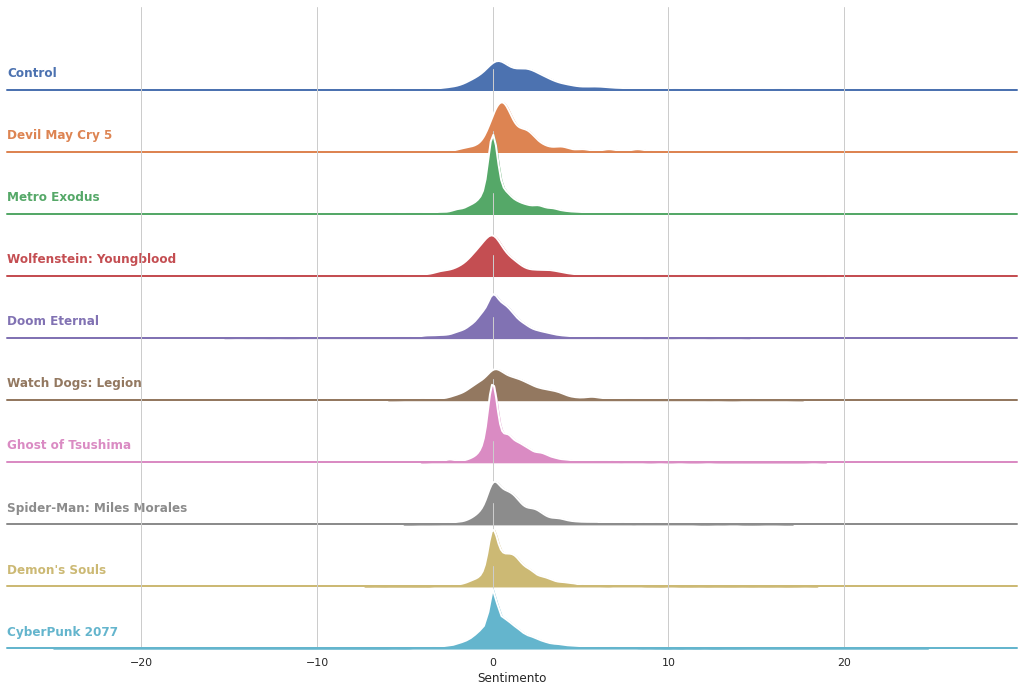

In [ ]:
sns.set_theme(style="whitegrid", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
g = sns.FacetGrid(finaldf, row="id", hue="id", aspect=15, height=1)

# Draw the densities in a few steps
g.map(sns.kdeplot, "Sentimento",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Sentimento", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "Sentimento")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


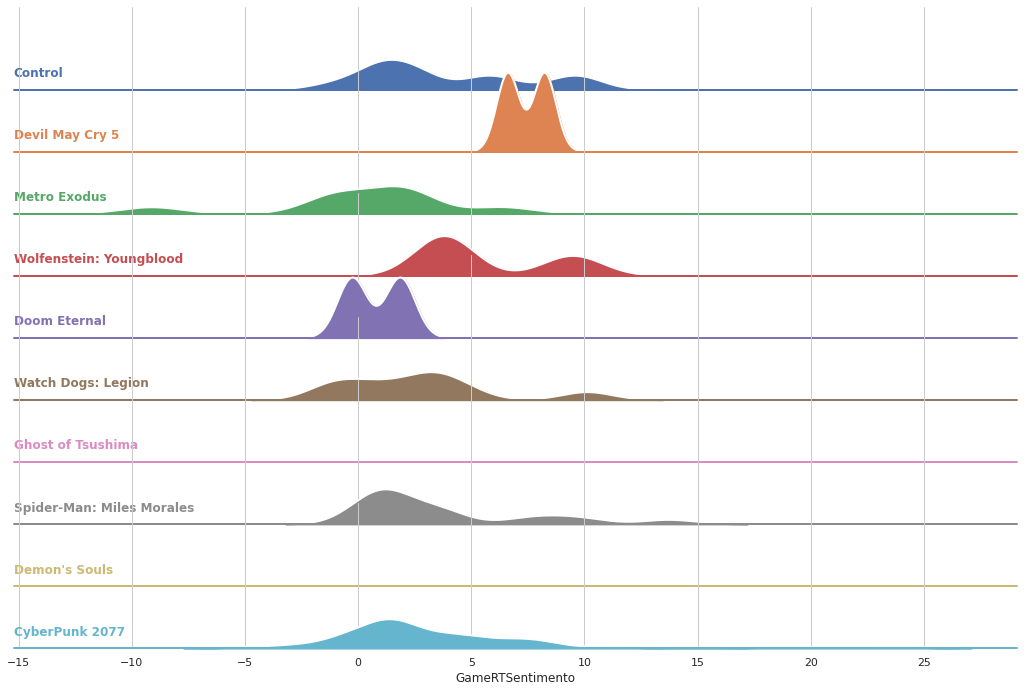

In [ ]:
# Initialize the FacetGrid object
g = sns.FacetGrid(finaldf2, row="id", hue="id", aspect=15, height=1)

# Draw the densities in a few steps
g.map(sns.kdeplot, "GameRTSentimento",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "GameRTSentimento", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "GameRTSentimento")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


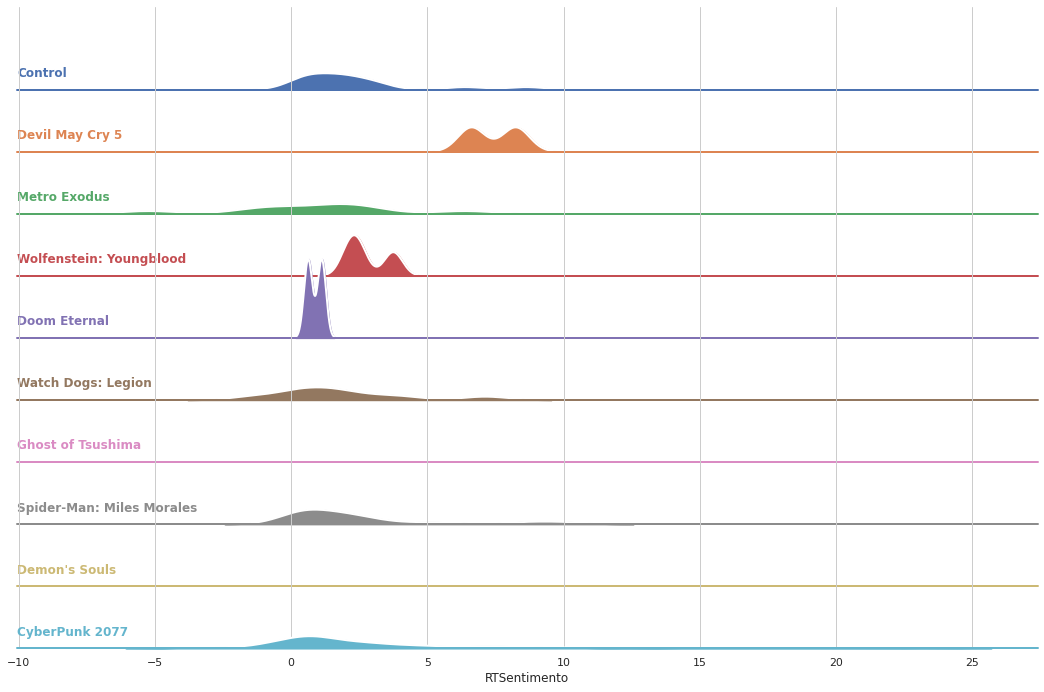

In [ ]:
# Initialize the FacetGrid object
g = sns.FacetGrid(finaldf2, row="id", hue="id", aspect=15, height=1)

# Draw the densities in a few steps
g.map(sns.kdeplot, "RTSentimento",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "RTSentimento", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "RTSentimento")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

(-1.290625, 7.853125)


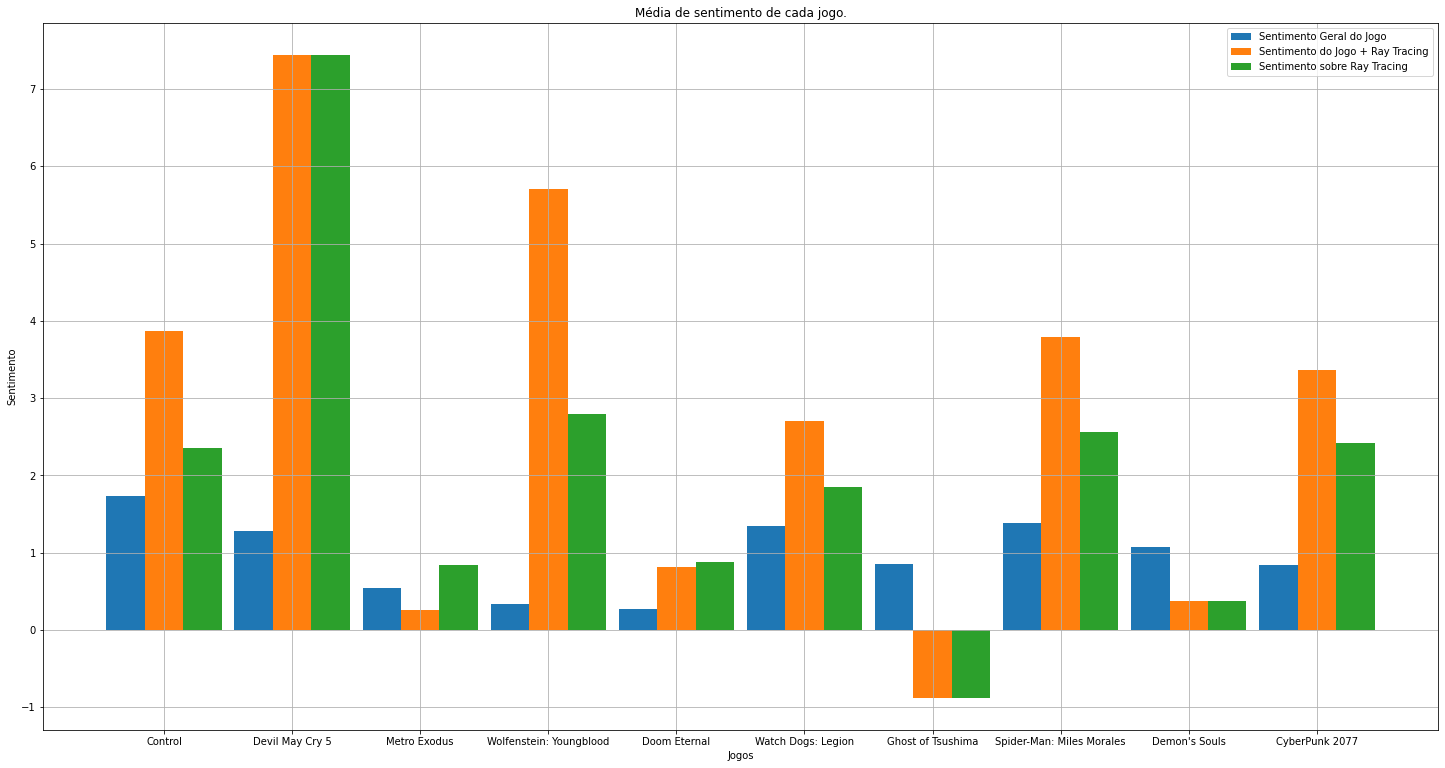

In [ ]:
pylab.rcParams['figure.figsize'] = (25, 13)

X_axis = np.arange(len(Final_Results['Game_Name']))

plt.bar(X_axis - 0.3, Final_Results['Game_Sentiment_Score'], 0.3, label="Sentimento Geral do Jogo")
plt.bar(X_axis, Final_Results['Game_And_RT_Sentiment_Score'], 0.3, label="Sentimento do Jogo + Ray Tracing")
plt.bar(X_axis + 0.3, Final_Results['RT_Sentiment_Score'], 0.3, label="Sentimento sobre Ray Tracing")
plt.legend()
plt.xticks(X_axis, Final_Results['Game_Name'])
plt.xlabel("Jogos")
plt.ylabel("Sentimento")
plt.title("Média de sentimento de cada jogo.")
ay = [i for i in range(int(plt.gca().get_ylim()[0]), int(plt.gca().get_ylim()[1] + 1), 1)]
plt.yticks(ay)
plt.grid(True)